In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

In [2]:
df.replace({97: pd.NA, 99: pd.NA}, inplace=True)

In [3]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    # Check if the column contains missing values
    if df[col].isna().any():
        # Replace missing values with the mode (most frequent value)
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)  # Reassigning directly to avoid chained assignment warning

# Confirm the changes
print(df[categorical_columns].head())

/var/folders/tg/nw46x5hx3x3_5gqfd9j7zhcc0000gn/T/ipykernel_27086/3004967662.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)  # Reassigning directly to avoid chained assignment warning


    DATE_DIED  INTUBED  PNEUMONIA  AGE  PREGNANT  ICU
0  03/05/2020        2          1   65         2    2
1  03/06/2020        2          1   72         2    2
2  09/06/2020        1          2   55         2    2
3  12/06/2020        2          2   53         2    2
4  21/06/2020        2          2   68         2    2


In [4]:
df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2,1,65,2,2,...,2,2,1,2,2,2,2,2,3,2
1,2,1,2,1,03/06/2020,2,1,72,2,2,...,2,2,1,2,2,1,1,2,5,2
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,2,53,2,2,...,2,2,2,2,2,2,2,2,7,2
4,2,1,2,1,21/06/2020,2,2,68,2,1,...,2,2,1,2,2,2,2,2,3,2


In [5]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,1.967903e+00,1.866449e+00,4.177982e+01,2.335935e+00,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,1.983923e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,1.762575e-01,3.401692e-01,1.688870e+01,5.734902e+00,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,1.257720e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,2.000000e+00


In [6]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [9]:
relevant_features = [
    'SEX', 'AGE', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 
    'INTUBED', 'ICU', 'HIPERTENSION', 'CARDIOVASCULAR', 
    'RENAL_CHRONIC', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL'
]

df = df[relevant_features]

missing_threshold = 0.5  # For example, drop columns with >50% missing values

missing_percentages = df.isna().mean()

df = df.loc[:, missing_percentages <= missing_threshold]

print("Remaining columns after filtering:", df.columns)

Remaining columns after filtering: Index(['SEX', 'AGE', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 'INTUBED', 'ICU',
       'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO',
       'CLASIFFICATION_FINAL'],
      dtype='object')


In [10]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

print(df['CLASIFFICATION_FINAL'].value_counts())

CLASIFFICATION_FINAL
0    656596
1    391979
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['SEX', 'TOBACCO', 'ICU', 'INTUBED', 'PNEUMONIA', 'HIPERTENSION', 
                       'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print(df[categorical_columns].head())

   SEX  TOBACCO  ICU  INTUBED  PNEUMONIA  HIPERTENSION  CARDIOVASCULAR  \
0    0        1    1        1          0             0               1   
1    1        1    1        1          0             0               1   
2    1        1    1        0          1             1               1   
3    0        1    1        1          1             1               1   
4    1        1    1        1          1             0               1   

   RENAL_CHRONIC  OBESITY  
0              1        1  
1              0        0  
2              1        1  
3              1        1  
4              1        1  


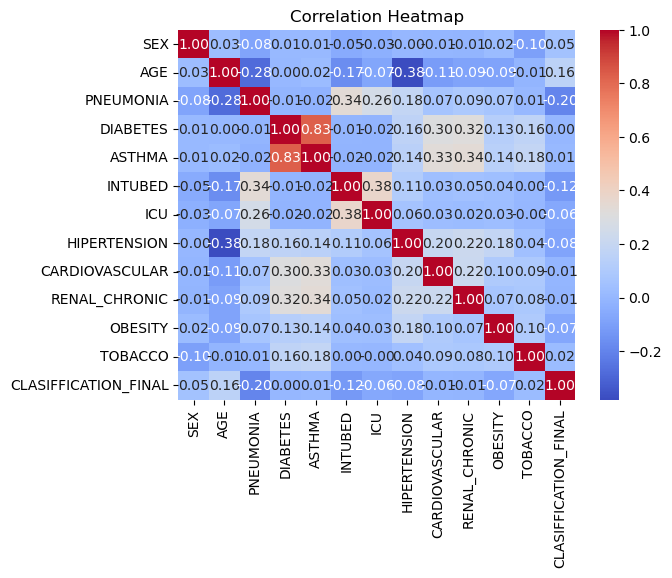

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

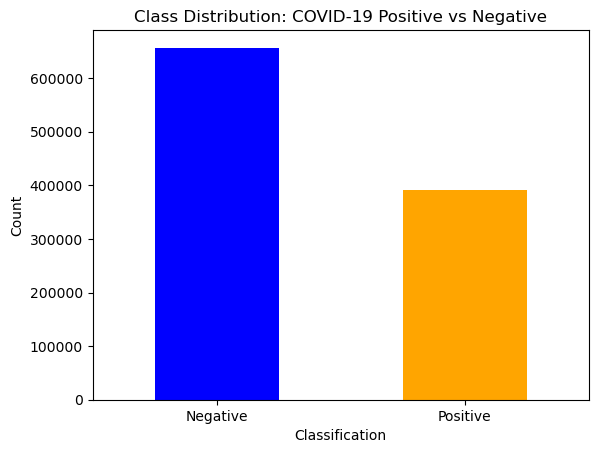

In [13]:
class_counts = df['CLASIFFICATION_FINAL'].value_counts()

plt.figure()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution: COVID-19 Positive vs Negative')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Classification')
plt.show()

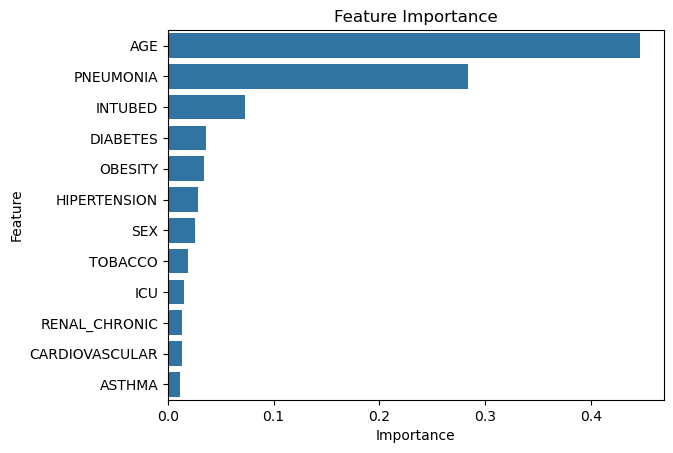

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

X = df.drop(columns=['CLASIFFICATION_FINAL'])
y = df['CLASIFFICATION_FINAL']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [15]:
high_correlation_threshold = 0.7
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()

redundant_features = highly_correlated_pairs[(highly_correlated_pairs > high_correlation_threshold) & 
                                             (highly_correlated_pairs < 1)]

print("Highly Correlated Feature Pairs:")
print(redundant_features)

Highly Correlated Feature Pairs:
DIABETES  ASTHMA    0.829349
dtype: float64


In [16]:
age_bins = [0, 20, 40, 60, 80, 120] 
age_labels = ['<20', '20-40', '40-60', '60-80', '80+'] 

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

print(df[['AGE', 'AGE_GROUP']].head())

   AGE AGE_GROUP
0   65     60-80
1   72     60-80
2   55     40-60
3   53     40-60
4   68     60-80


In [17]:
from scipy.stats import chi2_contingency

def chi_square_test(data, categorical_cols, target_col):
    results = {}
    for col in categorical_cols:
        if col != target_col:
            contingency_table = pd.crosstab(data[col], data[target_col])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            results[col] = p  # p-value indicates the strength of dependency
    return results

categorical_cols = ['SEX', 'TOBACCO', 'ICU', 'INTUBED', 'PNEUMONIA', 'HIPERTENSION', 
                    'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'AGE_GROUP']

chi_square_results = chi_square_test(df, categorical_cols, 'CLASIFFICATION_FINAL')

for feature, p_value in chi_square_results.items():
    print(f"Feature: {feature}, P-value: {p_value}")

# Features with p-value < 0.05 are likely to have a dependency with the target

Feature: SEX, P-value: 0.0
Feature: TOBACCO, P-value: 3.27682903927254e-108
Feature: ICU, P-value: 0.0
Feature: INTUBED, P-value: 0.0
Feature: PNEUMONIA, P-value: 0.0
Feature: HIPERTENSION, P-value: 0.0
Feature: CARDIOVASCULAR, P-value: 9.788042522953438e-44
Feature: RENAL_CHRONIC, P-value: 4.164888034493492e-56
Feature: OBESITY, P-value: 0.0
Feature: AGE_GROUP, P-value: 0.0


In [18]:
# install pgmpy
!pip install pgmpy

In [19]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import ParameterEstimator

# Define Bayesian Network manually
model = BayesianNetwork([
    ('AGE_GROUP', 'PNEUMONIA'),
    ('PNEUMONIA', 'ICU'),
    ('ICU', 'CLASIFFICATION_FINAL'),
    ('SEX', 'CLASIFFICATION_FINAL'),
    ('OBESITY', 'CLASIFFICATION_FINAL'),
    ('DIABETES', 'CLASIFFICATION_FINAL')
])

# Print the defined structure
print("Defined Bayesian Network structure:")
print(model.edges())

Defined Bayesian Network structure:
[('AGE_GROUP', 'PNEUMONIA'), ('PNEUMONIA', 'ICU'), ('ICU', 'CLASIFFICATION_FINAL'), ('SEX', 'CLASIFFICATION_FINAL'), ('OBESITY', 'CLASIFFICATION_FINAL'), ('DIABETES', 'CLASIFFICATION_FINAL')]


In [20]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Learn CPDs using Maximum Likelihood Estimation
model.fit(df, estimator=MaximumLikelihoodEstimator)

print("\nConditional Probability Distributions (CPDs):")
for cpd in model.get_cpds():
    print(cpd)


Conditional Probability Distributions (CPDs):
+------------------+-----------+
| AGE_GROUP(20-40) | 0.415944  |
+------------------+-----------+
| AGE_GROUP(40-60) | 0.370067  |
+------------------+-----------+
| AGE_GROUP(60-80) | 0.128402  |
+------------------+-----------+
| AGE_GROUP(80+)   | 0.0210458 |
+------------------+-----------+
| AGE_GROUP(<20)   | 0.0645413 |
+------------------+-----------+
+--------------+------------------+-----+---------------------+
| AGE_GROUP    | AGE_GROUP(20-40) | ... | AGE_GROUP(<20)      |
+--------------+------------------+-----+---------------------+
| PNEUMONIA(0) | 0.05379162023726 | ... | 0.07636385129144749 |
+--------------+------------------+-----+---------------------+
| PNEUMONIA(1) | 0.94620837976274 | ... | 0.9236361487085525  |
+--------------+------------------+-----+---------------------+
+-----------+---------------------+----------------------+
| PNEUMONIA | PNEUMONIA(0)        | PNEUMONIA(1)         |
+-----------+-----------

In [21]:
from pgmpy.inference import VariableElimination

# Perform inference
inference = VariableElimination(model)

# Example: Probability of classification (COVID-19 status) given some evidence
query_result = inference.query(variables=['CLASIFFICATION_FINAL'], evidence={'AGE_GROUP': '<20', 'SEX': 1})
print("\nInference result:")
print(query_result)


Inference result:
+-------------------------+-----------------------------+
| CLASIFFICATION_FINAL    |   phi(CLASIFFICATION_FINAL) |
+=========================+=============================+
| CLASIFFICATION_FINAL(0) |                      0.6010 |
+-------------------------+-----------------------------+
| CLASIFFICATION_FINAL(1) |                      0.3990 |
+-------------------------+-----------------------------+


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CLASIFFICATION_FINAL']) 
y = df['CLASIFFICATION_FINAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [23]:
# Fit the model using Maximum Likelihood Estimation
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

print("\nLearned CPDs:")
for cpd in model.get_cpds():
    print(cpd)


Learned CPDs:
+------------------+-----------+
| AGE_GROUP(20-40) | 0.415932  |
+------------------+-----------+
| AGE_GROUP(40-60) | 0.370174  |
+------------------+-----------+
| AGE_GROUP(60-80) | 0.128237  |
+------------------+-----------+
| AGE_GROUP(80+)   | 0.0210501 |
+------------------+-----------+
| AGE_GROUP(<20)   | 0.0646072 |
+------------------+-----------+
+--------------+-----+---------------------+
| AGE_GROUP    | ... | AGE_GROUP(<20)      |
+--------------+-----+---------------------+
| PNEUMONIA(0) | ... | 0.07585430659089232 |
+--------------+-----+---------------------+
| PNEUMONIA(1) | ... | 0.9241456934091077  |
+--------------+-----+---------------------+
+-----------+---------------------+-----------------------+
| PNEUMONIA | PNEUMONIA(0)        | PNEUMONIA(1)          |
+-----------+---------------------+-----------------------+
| ICU(0)    | 0.09915562854796672 | 0.0032566343433898717 |
+-----------+---------------------+-----------------------+
| ICU(1

In [24]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

evidence = {'AGE_GROUP': '20-40', 'SEX': 1}  # Example evidence
query_result = inference.query(variables=['CLASIFFICATION_FINAL'], evidence=evidence)
print("\nInference result for test evidence:")
print(query_result)


Inference result for test evidence:
+-------------------------+-----------------------------+
| CLASIFFICATION_FINAL    |   phi(CLASIFFICATION_FINAL) |
+=========================+=============================+
| CLASIFFICATION_FINAL(0) |                      0.6014 |
+-------------------------+-----------------------------+
| CLASIFFICATION_FINAL(1) |                      0.3986 |
+-------------------------+-----------------------------+


In [29]:
# Function to predict probabilities for each test case
def predict_probabilities(test_data, inference_engine, target):
    probabilities = []
    for _, row in test_data.iterrows():
        # Prepare evidence by removing the target variable
        evidence = {col: row[col] for col in test_data.columns if col != target}
        
        # Perform inference
        try:
            prob = inference_engine.query(variables=[target], evidence=evidence)
            probabilities.append(prob.values[1])  # Probability of target = 1
        except Exception as e:
            print(f"Error with evidence {evidence}: {e}")
            probabilities.append(0.5)  # Assign a neutral probability in case of error
    return probabilities

# Ensure test_data contains only the columns relevant to the Bayesian Network
network_nodes = list(model.nodes())  # Nodes in the Bayesian Network
filtered_test_data = test_data[network_nodes]

# Predict probabilities
test_probabilities = predict_probabilities(filtered_test_data, inference, 'CLASIFFICATION_FINAL')

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
test_predictions = [1 if prob >= threshold else 0 for prob in test_probabilities]

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
logloss = log_loss(y_test, test_probabilities)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Log-Loss: {logloss:.2f}")


Evaluation Metrics:
Accuracy: 0.63
Precision: 0.54
Recall: 0.11
F1-Score: 0.18
Log-Loss: 0.65


In [ ]:
!pip uninstall -y pgmpy